# Data Analyst Professional Practical Exam Submission

Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.

We have built long lasting relationships with our customers and they trust us to provide them
with the best products for them. As the way in which consumers buy products is changing,
our sales tactics have to change too. Launching a new product line is expensive and we need
to make sure we are using the best techniques to sell the new product effectively. The best
approach may vary for each new product so we need to learn quickly what works and what
doesn’t.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt

sb.set_theme(style = 'white')
%matplotlib inline

# Import data
df = pd.read_csv('product_sales.csv')

# Data Validation

In [2]:
# Copy of the orginal data
sales_data = df.copy()

In [3]:
# Data shape
sales_data.shape

(15000, 8)

The data set contains **15,000** observations and **8** features before the cleaning and validation process. Using the validation criteria, the following validation was made:
1. `week`: 6 unique values, without any missing data.
2. `sales_method`: had 5 unique values before validation: **Email, Call, Email + Call, em + call, and email**, which after validation were **Email, Call, and Email + Call**.
3. `customer_id`: 15,000 unique values. Needed no cleaning.
4. `nb_sold`: 10 unique values, needed no cleaning and no missing values.
5. `revenue`: had **1074** missing values, of which the rows were dropped from the data set.
6. `years as customer`: had two major values not corresponding: **47** and **63** which were way more than the number of years Pens and Printers has been in existence, **39 years**. It made no sense having a customer when the business was not in existence. These rows were dropped.
7. `nb_site_visits`: Needed to cleaning.
8. `state`: Needed to cleaning too.

At the end of the validation and cleaning process, the data conatined **13,924* rows and **8** columns.

In [4]:
sales_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
week,15000.0,3.098267,1.656420,1.00,2.00,3.0,5.0000,6.00
nb_sold,15000.0,10.084667,1.812213,7.00,9.00,10.0,11.0000,16.00
revenue,13926.0,93.934943,47.435312,32.54,52.47,89.5,107.3275,238.32
years_as_customer,15000.0,4.965933,5.044952,0.00,1.00,3.0,7.0000,63.00
nb_site_visits,15000.0,24.990867,3.500914,12.00,23.00,25.0,27.0000,41.00


In [5]:
# Duplicate values
sales_data.duplicated().sum()

0

In [6]:
# Data info
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
# Null values
sales_data.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [8]:
# Percentage of null values in the data set
print(f"Percentage of missing values: {sales_data['revenue'].isnull().sum()/sales_data.shape[0] * 100}%")

# Subset rows with null values in revenue
sales_data_null = sales_data[sales_data['revenue'].isnull()]
sales_data_null.head()

Percentage of missing values: 7.16%


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
16,2,Email,0f744f79-1588-4e0c-8865-fdaecc7f6dd4,10,NaN,6,30,Pennsylvania
17,6,Email + Call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin
28,5,Email,f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad,12,NaN,4,32,Florida


In [9]:
# Subset rows where revenue is not null
sales_data = sales_data[sales_data['revenue'].notnull()].reset_index(drop = True)
display(sales_data.shape)
sales_data.head()

(13926, 8)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
1,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
2,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
3,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
4,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [10]:
# Uniques values for sales method
sales_data['sales_method'].value_counts()

Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64

In [11]:
# Modify sales method
sales_data['sales_method'].replace({'em + call':'Email + Call', 'email':'Email'}, inplace = True)
sales_data['sales_method'].value_counts()

Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64

In [12]:
# Years as a customer
sales_data['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

In [13]:
sales_data = sales_data[(sales_data['years_as_customer'] != 47) & (sales_data['years_as_customer'] != 63)]
sales_data[['years_as_customer']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
years_as_customer,13924.0,4.971775,5.011542,0.0,1.0,3.0,7.0,39.0


In [14]:
# Unique values for state
sales_data['state'].value_counts().sort_index()

Alabama            202
Alaska              35
Arizona            295
Arkansas           118
California        1737
Colorado           212
Connecticut        167
Delaware            27
Florida            826
Georgia            460
Hawaii              67
Idaho               59
Illinois           576
Indiana            327
Iowa               154
Kansas             129
Kentucky           202
Louisiana          213
Maine               60
Maryland           245
Massachusetts      270
Michigan           466
Minnesota          228
Mississippi        133
Missouri           286
Montana             43
Nebraska            86
Nevada              97
New Hampshire       48
New Jersey         402
New Mexico          79
New York           899
North Carolina     430
North Dakota        25
Ohio               520
Oklahoma           184
Oregon             214
Pennsylvania       553
Rhode Island        41
South Carolina     213
South Dakota        38
Tennessee          308
Texas             1109
Utah       

In [15]:
# Final data set ready for analysis
sales_data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
1,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
2,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
3,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
4,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [16]:
# Customers count
sales_data.customer_id.nunique()

13924

# Exploratory Analysis

In [17]:
# Plot functions
# User defined histogram plot function
def hist_plot(data, x_arg, title, x_label, y_label, bin_size):
    """
    A univariate plot function that creates the histogram visualization of a feature in a dataframe using seaborn.
    
    Parameters:
        data (dataframe): The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        bin_size (int): user defined bin_size. Use None for default bin_size.
        kde (bool): Includes the kernel density. Value is either True or False.
    """
    sb.histplot(data = data, x = x_arg, bins = bin_size)
    plt.title(title, size = 12, weight = 'bold')
    plt.xlabel(x_label, size = 10, weight = 'bold')
    plt.ylabel(y_label, size = 10, weight = 'bold')

###########################################################################################################################
# User defined univariate plot function    
def plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_):
    """
    A univariate plot function that creates defined seaborn plot.
    
    Parameters:
        kind: seaborn plot
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses.
        y_arg: y-axis parameter enclosed in parentheses.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        color: color palete for visualization. Input None for default.
        marker_: Marker type to be used. Specifically for line plot. For other plots, use None.
    """
    if kind == sb.lineplot:
        kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color, marker = marker_)
        plt.title(title, size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')
        
    elif kind == sb.barplot:
        ax = kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title, size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')      
        for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/data['revenue'].sum() * 100)), (p.get_x()+0.2, p.get_height()+1),
                   ha = 'left', va = 'bottom', size = 12)
    
    else:
        kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title, size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')

###########################################################################################################################
# User defined scatter plot function    
def scatter_plot(data, x_arg, y_arg, title, x_label, y_label):
    """
    A plot function that creates a scatter plot of selected features
    
    Parameters:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
    """
    sb.scatterplot(data = data, x = x_arg, y = y_arg)
    plt.title(title, size = 12, weight = 'bold')
    plt.xlabel(x_label, size = 10, weight = 'bold')
    plt.ylabel(y_label, size = 10, weight = 'bold')
        
###########################################################################################################################
# A seaborn count plot function
# User defined univariate plot function
def count_plot(data, x_arg, y_arg, order, title, x_label, y_label):
    """
    A function that plots the count of a feature in a given dataframe using seaborn countplot.
    
    Args:
        data: data source
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        y_arg: y-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        order: Arrangement order. By default, input 'None'.
        title: Histogram title inputed as string with quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks.
        y_label: y_axis label inputed as string with quoatation marks.
    """
    if y_arg == None:
        ax = sb.countplot(data = data, x = x_arg, color = sb.color_palette()[0], order = order)
        plt.title(title, size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')
        for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/data.shape[0] * 100)), (p.get_x()+0.2, p.get_height()+1),
                   ha = 'left', va = 'bottom', size = 12)
                        
    elif x_arg == None:
        ay = sb.countplot(data = data, y = y_arg, color = sb.color_palette()[0], order = order)
        plt.title(title, size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')
        for p in ay.patches:
            ay.annotate('{:.3f}%'.format((p.get_width()/data.shape[0]) * 100),
                        (p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height()/2), size = 12)

### 1. How many customers were there for each approach?

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

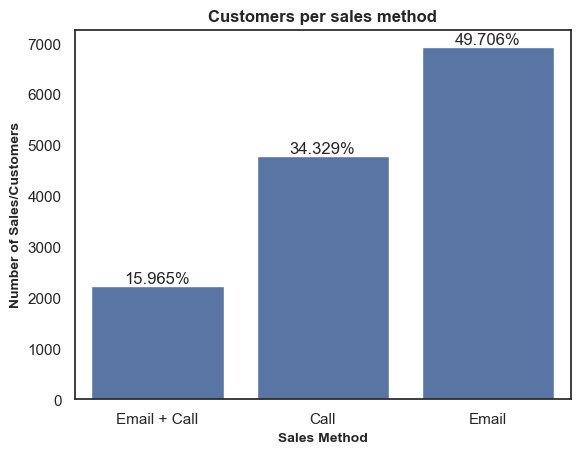

In [18]:
cust_per_approach = sales_data['sales_method'].value_counts()
display(cust_per_approach)

count_plot(sales_data, 'sales_method', None, None, 'Customers per sales method', 'Sales Method',
           'Number of Sales/Customers')

The Email approach has more number of customers as it racked up more sales: **6,921** in total. This s followed by Call approach and last the Email + Call approach with **4,780** and **2,223** customers respectively.

The visualization clearly depicts these results and also shows the percentage of customers per approach to the whole.

### 2. Revenue spread for all approach, and for individual approach.

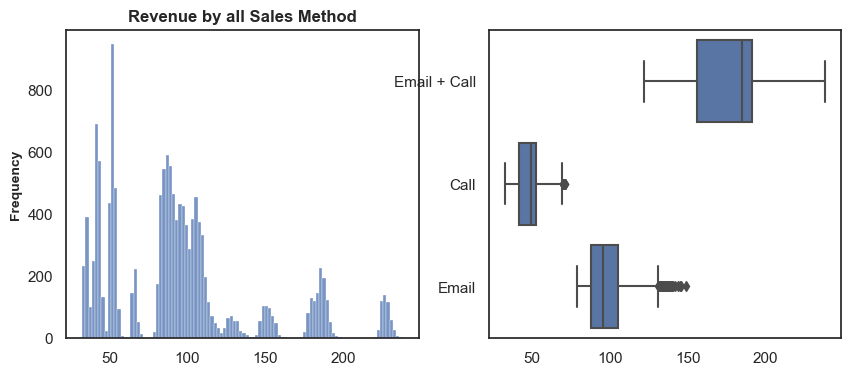

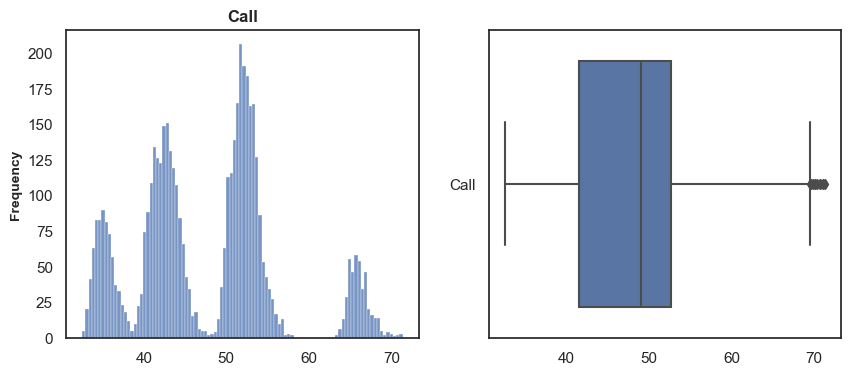

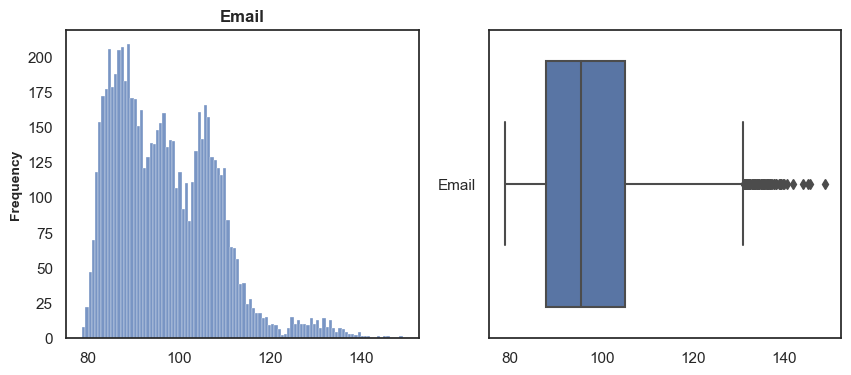

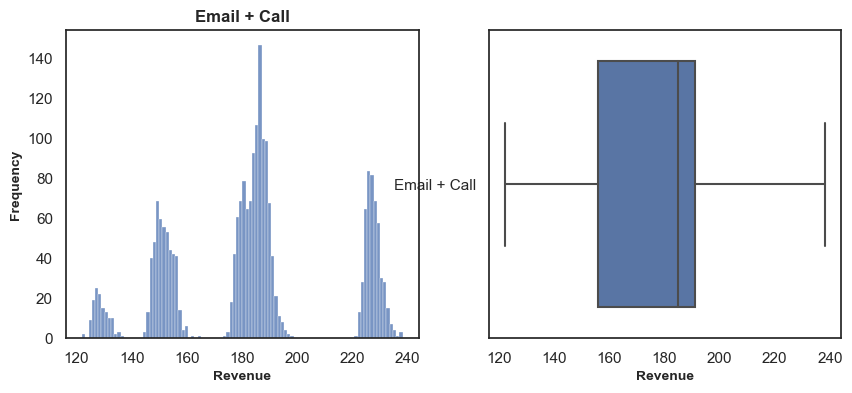

In [19]:
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(sales_data, 'revenue', 'Revenue by all Sales Method', '', 'Frequency', 100)
plt.subplot(1, 2, 2)
#plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_)
plot(sb.boxplot, sales_data, 'revenue', 'sales_method', None, '', '', '', sb.color_palette()[0], None)

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
call_sales = sales_data[sales_data['sales_method'] == 'Call']
hist_plot(call_sales, 'revenue', 'Call', '', 'Frequency', 100)
plt.subplot(1, 2, 2)
plot(sb.boxplot, call_sales, 'revenue', 'sales_method', None, '', '', '', sb.color_palette()[0], None)

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
email_sales = sales_data[sales_data['sales_method'] == 'Email']
hist_plot(email_sales, 'revenue', 'Email', '', 'Frequency', 100)
plt.subplot(1, 2, 2)
plot(sb.boxplot, email_sales, 'revenue', 'sales_method', None, '', '', '', sb.color_palette()[0], None)

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
email_call_sales = sales_data[sales_data['sales_method'] == 'Email + Call']
hist_plot(email_call_sales, 'revenue', 'Email + Call', 'Revenue', 'Frequency', 100)
plt.subplot(1, 2, 2)
plot(sb.boxplot, email_call_sales, 'revenue', 'sales_method', None, '', 'Revenue', '', sb.color_palette()[0], None)

From the distribution of the revenues, there appears to be a pattern relating to the sales approach used and the revenue generated. The following deductions were made from the visualizations above:
1. Low end revenues were mostly generated from calls. This can be clearly observed on the Call chart above, with revenue range between 0 to 70.
2. Email approach generated revenues in the mid range between 80 to 120, with huge values trickling in from 130 to 150.
3. A combination of both approach (Email + Call) yielded higher revenues ranging from 120 to 240 as observed from the histogram and boxplot for Email + call.

Revenue generated per approach:
sales_method
Call            227513.02
Email + Call    408256.69
Email           672220.61
Name: revenue, dtype: float64


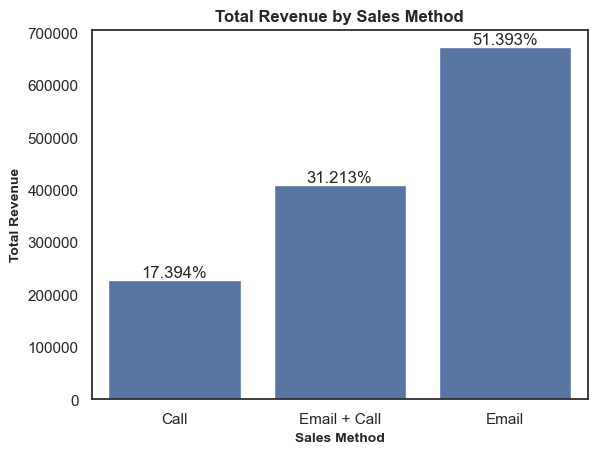

In [20]:
group_approach = sales_data.groupby('sales_method')['revenue'].sum().sort_values()
print(f"Revenue generated per approach:\n{group_approach}")
plot(sb.barplot, sales_data, group_approach.index, group_approach, None, 'Total Revenue by Sales Method',
     'Sales Method', 'Total Revenue', sb.color_palette()[0], None)

Summing up the total revenues by sales method, it can be seen that the Call approach generated less revenue as compared to the Email and Email + Call approaches. The Call approach, having more than twice the sales for Email + Call approach; 34.329% as against 15.965%) as seen in 1, generated only **17.394%** of the total revenue as compared to the **31.213%** generated through the Email + Call approach. While the Email approach generated the most revenue with **51.393%** of the total revenue.

### 3. Changes in revenue over time.

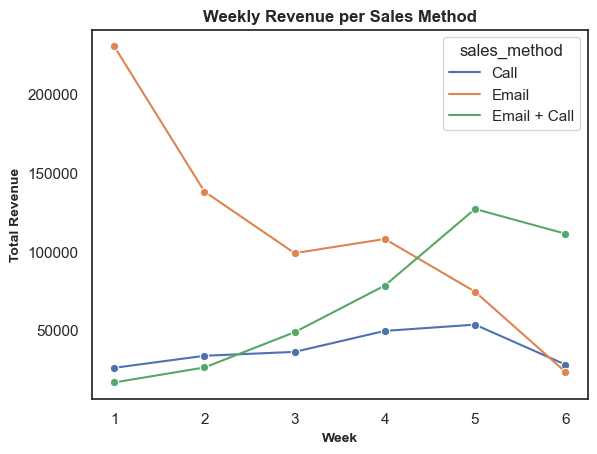

In [21]:
revenue_change = sales_data.groupby(['sales_method', 'week'])[['revenue']].sum()
plot(sb.lineplot, revenue_change, 'week', 'revenue', 'sales_method', 'Weekly Revenue per Sales Method','Week',
     'Total Revenue', None, 'o')

From the above visualization, the weekly revenue has been summed with respect to each sales method. The following are observed:
1. There is a progressive positive increase in the revenue from first to fifth week for the Call and Email + Call approaches, with a decline on the sixth week. This is quite the opposite for the Email approach as it has a negative revenue decline on a weekly basis.
2. There is relatively small increase in the revenue generated by the Call approach on a weekly basis, with its peak coming on the fifth week, and a decline in revenue on the sixth week. This goes to buttress our assertions in 1 and 2 above, where the Call approach though having the second most sales, generated the least revenue.
3. The Email approach generated the highest revenue in the first week. This is followed by a sharp decline in the revenue as the week progresses.
4. The Email + Call approach has a progressive increase in weekly revenue generated, though starting with the least revenue in the first week, and having its peak value on the fifth week, and then starts to declines on the sixth week.

### 4. Correlation between revenue and years as a customer.

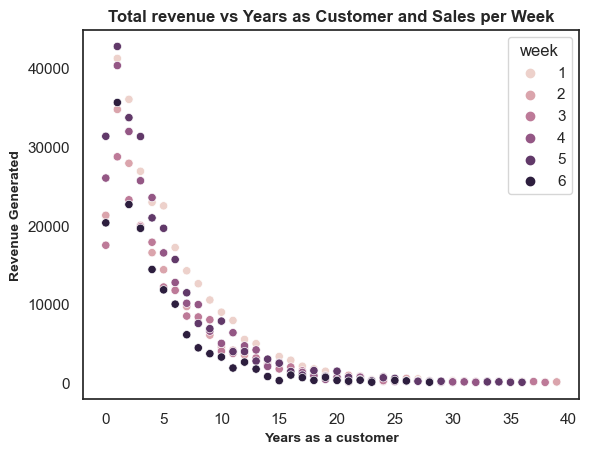

In [22]:
revenue_year = sales_data.groupby(['years_as_customer', 'week'])[['revenue']].sum()
plot(sb.scatterplot, revenue_year, 'years_as_customer', 'revenue', 'week', 
     'Total revenue vs Years as Customer and Sales per Week', 'Years as a customer', 'Revenue Generated', None, None)

The plot above show the correlation between total revenue generated on a weekly basis after product launch against the number of years as a customer. The decline in the plot gives a clear indication that most revenue is generated from New customers in the business, who have stayed in contact within **0** to **10 years**, and this revenue stream comes in within the first four weeks of the product launch. 

The visualization also shows the relationship between the week, total revenue and customers number of years, of which most product sales happens between the first, second and third week, with these sales being made to customers between **0** to **10 years**. This accounts for the high revenue in the first week using the Email sales method as observed in 3 above. Fewer sales are completed in the sixth week thus the decline in revenue as also observed in 3 above.

### 5. Number of products sold per sales method

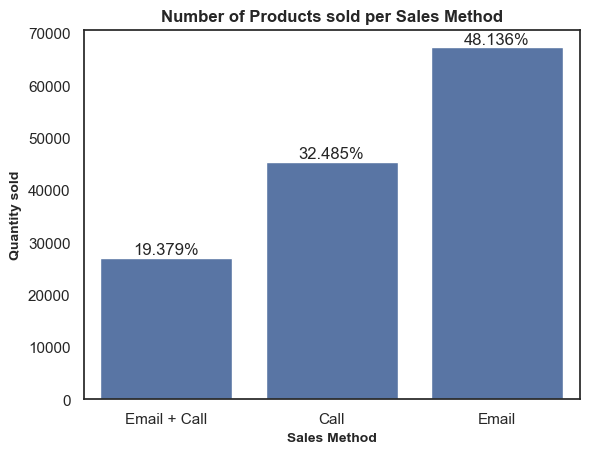

In [23]:
quantity_per_method = sales_data.groupby('sales_method')['nb_sold'].sum().sort_values()
ax = sb.barplot(data = sales_data, x = quantity_per_method.index, y = quantity_per_method, color = sb.color_palette()[0])
plt.title('Number of Products sold per Sales Method', size = 12, weight = 'bold')
plt.xlabel('Sales Method', size = 10, weight = 'bold')
plt.ylabel('Quantity sold', size = 10, weight = 'bold')      
for p in ax.patches:
    ax.annotate('{:.3f}%'.format((p.get_height()/sales_data['nb_sold'].sum() * 100)), (p.get_x()+0.2, p.get_height()+1),
           ha = 'left', va = 'bottom', size = 12)

The Email + Call approach has the least number of products sold with only **19.379%** of the total sales. This is followed by Call approach with **32.485%** and then Email approach with **48.136%**.

# Metrics
Since our objective is to select which approach or approaches to use based on the analysis of the results, I would recommend the a discontinuation of the Calls approach, and a shift to the Email and Email + Call approaches only. This is owing to the results in 1, 2, and 3 above, where the Calls approach though having the second most sales in number of products, generated way less revenue, and also takes the sales agent more time (30 minutes on average) compared to other approaches.

A situation where the Call approach can still be used will be permitted only when the customer does not have an email address.

To monitor the metircs, the following can be used:

### 1. Sales method

In [24]:
# Sales method percentage
print('Percenatge of sales made with each method:')
sales_approach = ['Call', 'Email', 'Email + Call']
for approach in sales_approach:
    print(approach + " sales: {:.3f}%".format(sales_data[sales_data['sales_method'] == approach].shape[0]
                                              / sales_data.shape[0] * 100))

Percenatge of sales made with each method:
Call sales: 34.329%
Email sales: 49.706%
Email + Call sales: 15.965%


Based on the above calculated values, a decrease in the number of Call sales percentage, and increase in Email or/and Email + Call sales percentage will show a positive results in revenue and a good sign of achieving the goal.

### 2. Incremental sales approach revenue percentage

In [25]:
sales_data.groupby('sales_method')['revenue'].sum() / sales_data['revenue'].sum() * 100

sales_method
Call            17.394091
Email           51.393393
Email + Call    31.212516
Name: revenue, dtype: float64

As noted earlier, the Call approach generates the least revenue among the three approaches. An incremental increase in the revenue percentage for Email and Email + Call methods will show a move away from Calls approach and a positive sign.

# Recommendations
from the analysis performed using the data provided, the following are recommended:
- Use key metrics to monitor whether there is a change in the sales approach.
- The Email method should be used frequently to communicate new products to customers, then a follow up call in the second and third week to talk about their needs and how the new product will support their work. This recommendation is based on the result obyained from 3 above.
- The Call method should be used less often, and if possible not at all. This is because it takes more time to make sales via this means and in the end it generates the least revenue, even with a high number of sales.
- The sales team should focus more on the Email and Email + Call approaches. As evident in 3 above, Email sales approach generate the most revenues within the first three weeks, though with a decline as the week progresses. This should be followed up with a call from the second or third week to further boost sales, and hence further generate more revenue.
- Expand their customer segment by improving marketing means and conversion rate based on the website visits. This is evident in 4 above, the longer the customer stays, the less revenue generated from the particular customer. Thus to mitigate this, new customers should be on-boarded and a retention means developed for existing customers to increase sales.
- Accurate data collation to enable in-depth analysis, especially in the revenue, which had lots of missing values.